In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time

In [30]:
# Load and preprocess the dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the CNN architecture


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(8, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_50. Consider increasing the input size. Received input shape [None, 1, 1, 8] which would produce output shape with a zero or negative value in a dimension.

In [17]:
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))
end_time = time.time()

Epoch 1/5
   5/1875 [..............................] - ETA: 24s - loss: 0.0097 - accuracy: 0.9938     

2023-02-18 15:02:12.335102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1870/1875 [============================>.] - ETA: 0s - loss: 0.0092 - accuracy: 0.9973

2023-02-18 15:02:26.725095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0353 - val_accuracy: 0.9918
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0333 - val_accuracy: 0.9922
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0361 - val_accuracy: 0.9913
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0358 - val_accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0564 - val_accuracy: 0.9893


In [18]:
total_time = end_time - start_time
print(f'Total time elapsed during training: {total_time:.2f} seconds')
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Total time elapsed during training: 76.84 seconds
313/313 [==============================] - 1s 4ms/step - loss: 0.0564 - accuracy: 0.9893
Test accuracy: 0.9893000721931458


1/1 [==============================] - 0s 14ms/step


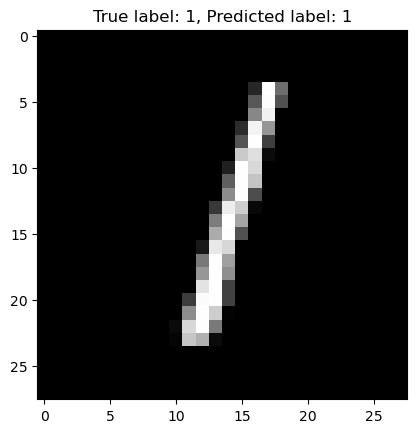

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Select a sample image from the test set
img_index = 2
img = test_images[img_index]
label = test_labels[img_index]

# Reshape the image to match the input shape of the model
img = np.reshape(img, (1, 28, 28, 1))

# Make a prediction using the trained model
pred = model.predict(img)
predicted_label = np.argmax(pred)

# Plot the image and the predicted label
plt.imshow(np.squeeze(img), cmap='gray')
plt.title(f"True label: {label}, Predicted label: {predicted_label}")
plt.show()


1/1 [==============================] - 0s 7ms/step


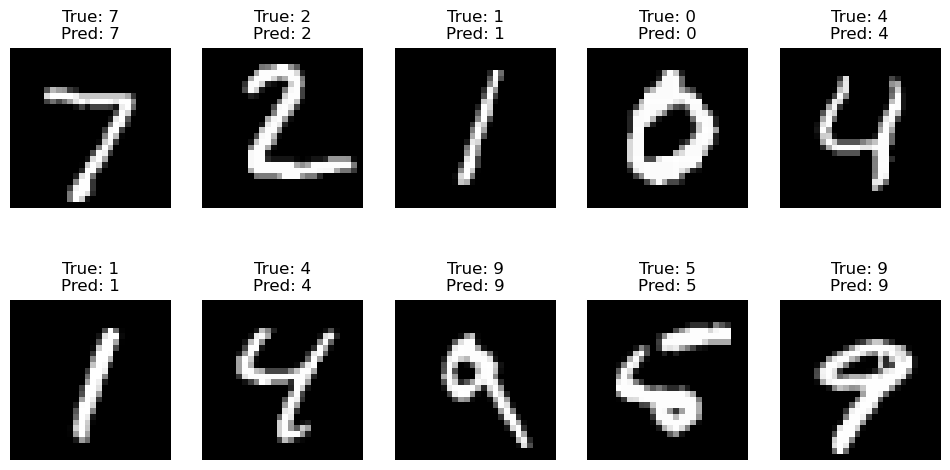

In [10]:
# Display predictions for multiple images
n_cols = 5
n_rows = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 6))
for i in range(n_rows):
    for j in range(n_cols):
        # Select an image from the test set
        img_index = i * n_cols + j
        img = test_images[img_index]
        label = test_labels[img_index]
        
        # Reshape the image to match the input shape of the model
        img = np.reshape(img, (1, 28, 28, 1))
        
        # Make a prediction using the trained model
        pred = model.predict(img)
        predicted_label = np.argmax(pred)
        
        # Display the image and the predicted label
        axs[i, j].imshow(np.squeeze(img), cmap='gray')
        axs[i, j].set_title(f"True: {label}\nPred: {predicted_label}")
        axs[i, j].axis('off')
plt.show()

In [20]:
from keras.layers import LeakyReLU

def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.1), input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
    Reshape((1, 64)), # Reshape to (batch_size, 1, 64)
    model.add(Dense(10, activation='softmax'))
    return model


In [19]:

from keras.utils import to_categorical

# Load the MNIST test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


ValueError: in user code:

    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1502, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 987, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 501, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 646, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/metrics/metrics.py", line 3327, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 885, in sparse_categorical_matches
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](IteratorGetNext:1)' with input shapes: [?,10].


ValueError: in user code:

    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1557, in test_function  *
        return step_function(self, iterator)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1546, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1535, in run_step  **
        outputs = model.test_step(data)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1502, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/training.py", line 987, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 501, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 646, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/metrics/metrics.py", line 3327, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/Users/gedena/miniconda3/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 885, in sparse_categorical_matches
        y_true = tf.squeeze(y_true, [-1])

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](IteratorGetNext:1)' with input shapes: [?,10].
